### 【 251127_과제 】
- 이서범


In [2]:
# ## ===============================================================
# ## [문제 1] 개념 비교
# ## ===============================================================
# ## 일반 평균, 절사 평균, 가중 평균의 공통점과 차이점을 간단히 서술하세요.
# ## 다음 상황에서 어떤 평균을 쓰는 것이 적절한지 고르고 이유를 쓰세요.

# 공통점은 평균을 낸다는 점이 동일하다.
# 차이점은 
#  1) 일반 평균은 모든 값을 다 더해서 개수만큼 나눠 계산한다.
#  2) 절사 평균은 정렬을 하고 양 끝의 값은 삭제한 뒤 평균을 낸다.
#  3) 가중 평균은 특정 값이 큰 변화량 혹은 작은 변화량을 가질때 값을 맞춰주기 위해 사용한다. 
#     계산은 (가중치 * 데이터 합계)를 가중치의 합으로 나눈다.


# ## (1) 극단값이 포함된 연봉 데이터의 대표값
# -> 절삭 평균
# 극단값은 평균 데이터에서 불필요한 데이터이다. 따라서 제거하는게 옳다.
# 이에 적합하게 가중오름/내림 차순으로 정렬하면 양 극단에 분포되고, 해당 값을 삭제해서 평균낼 수 있는

# ## (2) 각기 다른 표본 수를 가진 실험 그룹들의 평균 반응값 통합
# -> 가중 평균
# 애초에 다른 표본 수를 가진 실험 이기에, 개수에 따른 가중치를 줘야한다.

# ## (3) 시험 점수 중 최근 시험에 더 높은 비중을 주고 싶을 때
# -> 가중 평균.
# 이유는 최근 시험에 높은 비중, 즉 가중치를 줘서 점수를 매길 수 있기 때문이다.

In [3]:
import numpy as np
import pandas as pd

In [4]:
## ===============================================================
## [문제 2] 반별 평균을 통합할 때 – 가중평균
## ===============================================================
## A반과 B반의 시험 결과가 다음과 같다.
##
## A반: 학생 수 10명, 평균 90점
##
## B반: 학생 수 40명, 평균 70점

## 전체 50명에 대한 단순 평균을 잘못 계산한 경우 (반 평균의 평균)과
mean_1 = (90 + 70) / 2 
## 올바른 전체 평균(가중평균) 을 계산하세요.
mean_2 = ((90 * 1) + (70 * 4)) / 5 
mean_1, mean_2

(80.0, 74.0)

In [5]:
## ===============================================================
## [문제 3] 절사 평균 계산
## ===============================================================
## 데이터는 아래와 같습니다. 
x=[10,12,11,9,13,200]

## 일반 평균을 구하시오.
print(np.mean(x))

## 가장 작은 값과 가장 큰 값(10, 200)을 하나씩 제거한 후 절사 평균을 구하시오.
x = sorted(x)
print(x)
print(np.mean(x[1:-1]))

## 왜 절사 평균이 일반 평균보다 극단값에 덜 민감한지 설명하시오.


42.5
[9, 10, 11, 12, 13, 200]
11.5


In [6]:
## ===============================================================
## [문제 4] 가중 평균 계산
## ===============================================================
## 어떤 회사의 고객 만족도 조사는 다음과 같습니다. 
##  그룹	응답자 수	평균 점수
##  VIP	       20	    4.8
##  일반	  200	    4.2
##
## 전체 고객의 가중 평균 만족도 점수를 계산하시오.
## 단순히 (4.8 + 4.2) / 2 로 계산하는 것이 왜 잘못되었는지 설명하시오.
ret = ((4.8*20) + (4.2*200))/(20+200)
ret

# -> VIP는 일반 고객에 비해 소수 인원이다. 따라서 사람 수가 다르기에 전체 고객의 만족도를 
#    정확하게 낼려면 둘의 가중치를 다르게 해서 계산해야한다. 

4.254545454545455

In [7]:
## ===============================================================
##  [문제 5] Pandas로 그룹별 가중평균 계산 
## ===============================================================
## 다음과 같은 DataFrame이 있습니다.

df = pd.DataFrame({
    "group":  ["A", "A", "A", "B", "B"],
    "score":  [80, 90, 70, 60, 100],
    "weight": [1, 2, 1, 3, 1]
})
display(df)


## group별 단순 평균(score의 평균)을 구하시오.
g_mean = df.groupby(['group'])['score'].mean()
print('평균 :', g_mean)


## group별 가중평균(weight를 가중치로 사용)을 구하는 Pandas 코드를 작성하시오.
w_mean = df.groupby('group').apply(
    lambda g: (g['score'] * g['weight']).sum() / g['weight'].sum()
)
print('가중 평균 :', w_mean)

,group,score,weight
0,A,80,1
1,A,90,2
2,A,70,1
3,B,60,3
4,B,100,1


평균 : group
A    80.0
B    80.0
Name: score, dtype: float64
가중 평균 : group
A    82.5
B    70.0
dtype: float64


C:\Users\qjadl\AppData\Local\Temp\ipykernel_32748\3845350894.py:20: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  w_mean = df.groupby('group').apply(


In [8]:
## ===============================================================
##  [ 문제 6 ] 분산과 표준편차 비교
## ===============================================================
## 다음은 어느 반 학생 10명의 수학 시험 점수이다.
# A반: [70, 72, 75, 75, 76, 80, 82, 85, 88, 90]
# B반: [40, 55, 60, 70, 75, 90, 95, 98, 100, 100]

class_A = [70, 72, 75, 75, 76, 80, 82, 85, 88, 90]
class_B = [40, 55, 60, 70, 75, 90, 95, 98, 100, 100]
df = pd.DataFrame({
    'A반' : class_A, 
    'B반' : class_B
})
df

## 두 반의 분산(sample variance)을 각각 구하시오.
var_ = df.var()
print(var_)

## 두 반의 표준편차를 비교하고, 어느 반의 점수 분포가 더 불안정한지 설명하시오.
std_ = df.std()
print(std_)

# B반의 편차가 불안정하다. 이유는 편차가 크면 점수가 들쑥날쑬하게 분포되어 있다는 뜻인데, 
# B반이 A반에 비해 표준편차가 약 3배정도 더 크기 때문이다.

A반     46.455556
B반    463.344444
dtype: float64
A반     6.815831
B반    21.525437
dtype: float64


In [9]:
## ===============================================================
##  [ 문제 7] 중위절대편차(Median Absolute Deviation, MAD) 계산
## ===============================================================
## 다음은 특정 제조 공정에서 측정한 부품 길이(mm) 데이터입니다..

## [99.8, 100.1, 100.0, 100.2, 99.9, 100.3, 100.5, 94.0]
data = [99.8, 100.1, 100.0, 100.2, 99.9, 100.3, 100.5, 94.0]
df = pd.DataFrame({'길이':data})
df

## 위 데이터의 중앙값(median)을 구하시오.
mid = df.길이.median()
print('중앙값', mid)

## 각 데이터에서 중앙값을 뺀 절대값을 구하시오.
abs_ = abs(df.길이 - mid)
print('중앙값을 뺀 절대값',abs_)

## 그 절대값 리스트의 중앙값(MAD)을 구하시오.
print('절대값 리스트의 중앙값',abs_.median())


## 이 데이터에서 MAD가 낮은지 높은지 해석하시오.
# MAD는 매우 작은 값이다.
# 즉, 전반적인 데이터의 분포가 매우 안정적이고 공정의 길이 편차가 거의 없는 상태이다.
# → 따라서 MAD가 낮다는 것은 공정 변동성이 매우 작은 안정된 품질을 의미한다.


## 마지막 데이터 94.0을 제거했을 때 MAD는 어떻게 변하는가? 그 이유는?
data = [99.8, 100.1, 100.0, 100.2, 99.9, 100.3, 100.5]
df = pd.DataFrame({'길이':data})
df_mad = abs(df['길이'] - df['길이'].median()).median()
df_mad ## 0.19999가 나옴
# -> MAD는 중앙값 기반이기 때문에, 이상치(94.0)를 제거해도 MAD는 크게 변하지 않는다.
# 따라서 MAD가 이상치에 강건한 통계임을 보여준다.   

중앙값 100.05
중앙값을 뺀 절대값 0    0.25
1    0.05
2    0.05
3    0.15
4    0.15
5    0.25
6    0.45
7    6.05
Name: 길이, dtype: float64
절대값 리스트의 중앙값 0.20000000000000284


np.float64(0.19999999999998863)

In [10]:
## ===============================================================
##  [ 문제 8 ] 이상치 포함 시 통계량 비교
## ===============================================================
## 어느 판매원의 하루 판매 금액(만원 단위)이 일주일 동안 다음과 같습니다.
##  [10, 12, 11, 9, 10, 13, 100]
data = [10, 12, 11, 9, 10, 13, 100]
arr = pd.Series(data)

print("데이터:", arr)

##  평균(mean)과 중앙값(median)을 각각 구하시오.
mean_value = arr.mean()
median_value = np.median(arr)
print("평균:", mean_value)
print("중앙값:", median_value)

##  분산과 표준편차를 구하시오.
var_value = np.var(arr, ddof=1)   # 자유도 1 -> 표본집단으로 사용 
std_value = np.std(arr, ddof=1) 
print("분산:", var_value)
print("표준편차:", std_value)

##  중위절대편차(MAD)를 구하시오.
abs_dev = np.abs(arr - median_value)
mad_value = np.median(abs_dev)
print("절대편차 리스트:", abs_dev)
print("MAD:", mad_value)

##  왜 이 데이터에서는 평균보다 중앙값이 대표값으로 적절한지 설명하시오.
# -> 이 데이터는 100이라는 이상치(outlier) 때문에 평균과 분산/표준편차가 크게 왜곡되기 때문

##  MAD가 왜 robust한 지표인지 해당 데이터를 기준으로 설명하시오.
# -> 중앙값과 MAD는 이상치의 영향을 상대적으로 덜 받기 때문에 더 robust한(강건한) 지표로 사용할 수 있다.



데이터: 0     10
1     12
2     11
3      9
4     10
5     13
6    100
dtype: int64
평균: 23.571428571428573
중앙값: 11.0
분산: 1137.6190476190477
표준편차: 33.72860874123105
절대편차 리스트: 0     1.0
1     1.0
2     0.0
3     2.0
4     1.0
5     2.0
6    89.0
dtype: float64
MAD: 1.0



A공정: 50.0 50.0 51.0
B공정: 49.5 51.0 54.25
A공정 IQR: 1.0
B공정 IQR: 4.75
A공정 이상치: 없음
B공정 이상치: 없음


C:\Users\qjadl\AppData\Local\Temp\ipykernel_32748\2943084884.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([A, B], labels=['A 공정', 'B 공정'])
c:\Users\qjadl\anaconda3\envs\SDATA_311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\qjadl\anaconda3\envs\SDATA_311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\qjadl\anaconda3\envs\SDATA_311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\qjadl\anaconda3\envs\SDATA_311\Lib\site-packages\IPython\

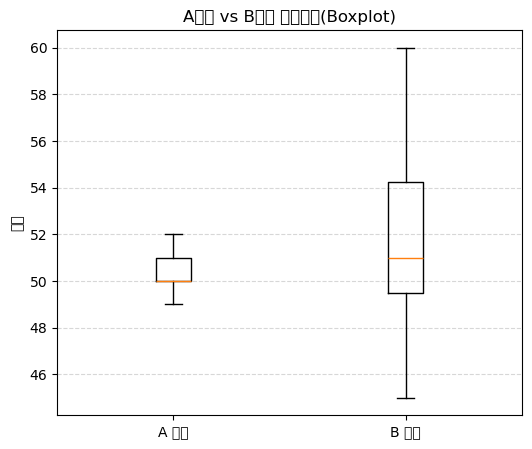

In [14]:
## ===============================================================
##  [ 문제 9] 상자그림(Boxplot) 분석
## ===============================================================
## 다음은 두 공정(A, B)에서 생산된 동일 부품의 길이 데이터이다.

import matplotlib.pyplot as plt


## A공정: [50, 50, 51, 50, 49, 50, 51, 52]
## B공정: [50, 55, 45, 50, 60, 48, 54, 52]
A = np.array([50, 50, 51, 50, 49, 50, 51, 52])
B = np.array([50, 55, 45, 50, 60, 48, 54, 52])


## 각 공정의 Q1, Q2(중앙값), Q3를 구하시오.
print()


A_Q1, A_Q2, A_Q3 = np.quantile(A, 0.25), np.quantile(A, 0.50), np.quantile(A, 0.75)
B_Q1, B_Q2, B_Q3 = np.quantile(B, 0.25), np.quantile(B, 0.50), np.quantile(B, 0.75)
print("A공정:", A_Q1, A_Q2, A_Q3)
print("B공정:", B_Q1, B_Q2, B_Q3)

## IQR(사분위수 범위)을 계산하시오.
A_IQR = A_Q3 - A_Q1
B_IQR = B_Q3 - B_Q1

print("A공정 IQR:", A_IQR)
print("B공정 IQR:", B_IQR)

## 사분위수 1.5 IQR 규칙에 따라 각 공정의 이상치를 판정하시오.
A_lower = A_Q1 - 1.5 * A_IQR
A_upper = A_Q3 + 1.5 * A_IQR
B_lower = B_Q1 - 1.5 * B_IQR
B_upper = B_Q3 + 1.5 * B_IQR

A_outliers = A[(A < A_lower) | (A > A_upper)]
B_outliers = B[(B < B_lower) | (B > B_upper)]

print("A공정 이상치:", A_outliers if len(A_outliers)>0 else "없음")
print("B공정 이상치:", B_outliers if len(B_outliers)>0 else "없음")

## 두 공정의 상자그림을 그리고, 변동성 차이를 해석하시오.
plt.figure(figsize=(6,5))
plt.boxplot([A, B], labels=['A 공정', 'B 공정'])
plt.title("A공정 vs B공정 상자그림(Boxplot)")
plt.ylabel("길이")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
# -> A공정은 측정값이 중앙값 주변으로 밀집되어 있어 변동성이 매우 작다.
# B공정은 값의 분포가 넓고 편차가 큰 편으로 변동성이 높다.
# 따라서 A공정은 안정적인 분포, B공정은 산포가 큰 불안정한 분포


## 품질 안정성 측면에서 어떤 공정이 더 적합한지 설명하시오.
# 품질 안정성 관점에서는 일관성이 높은 A공정이 훨씬 더 적합하다.

평균(mean)     : 8063.5
중앙값(median) : 3975.0
분산(variance) : 55864855.526315786
표준편차(std)  : 7474.27959915307
절대편차 리스트: [  475.   225.   175.    25.   125.    25.    45.    75.   175.   275.
 16025. 17025. 16525. 15825. 18025.   375.   275.   175.    75.    25.]
MAD: 200.0


c:\Users\qjadl\anaconda3\envs\SDATA_311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44152 (\N{HANGUL SYLLABLE GEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\qjadl\anaconda3\envs\SDATA_311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\qjadl\anaconda3\envs\SDATA_311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\qjadl\anaconda3\envs\SDATA_311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\qjadl\anaconda3\envs\SDATA_311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47336 (\N{HANGUL SYLLABL

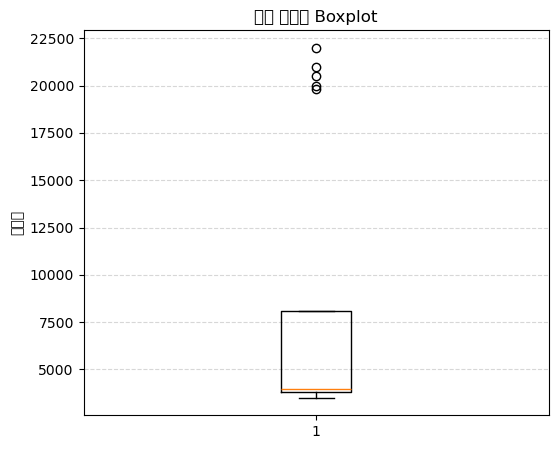

In [ ]:
## ===============================================================
##  [ 문제 10 ] 분산·표준편차 vs MAD vs Boxplot 통합 분석
## ===============================================================
## 다음은 20명의 하루 걸음수 데이터입니다.

## [3500, 4200, 3800, 4000, 4100,
##  3950, 4020, 3900, 3800, 3700,
##  20000, 21000, 20500, 19800, 22000,
##  3600, 3700, 3800, 3900, 4000]
data = np.array([
    3500, 4200, 3800, 4000, 4100,
    3950, 4020, 3900, 3800, 3700,
    20000, 21000, 20500, 19800, 22000,
    3600, 3700, 3800, 3900, 4000
])


## 평균, 중앙값을 구하시오.
mean_value = data.mean()
median_value = np.median(data)

print("평균(mean)     :", mean_value)
print("중앙값(median) :", median_value)

## 분산, 표준편차를 구하시오.
var_value = np.var(data, ddof=1)
std_value = np.std(data, ddof=1)

print("분산(variance) :", var_value)
print("표준편차(std)  :", std_value)



## MAD를 구하시오.
abs_dev = np.abs(data - median_value)
mad_value = np.median(abs_dev)

print("절대편차 리스트:", abs_dev)
print("MAD:", mad_value)


## 상자그림(Boxplot)을 그리고 극단치를 판정하시오.
Q1, Q2, Q3 = np.percentile(data, [25, 50, 75])
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = data[(data < lower) | (data > upper)]

plt.figure(figsize=(6,5))
plt.boxplot(data, vert=True)
plt.title("하루 걸음수 Boxplot")
plt.ylabel("걸음수")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


## 이 데이터에서 “변동성을 판단할 때 표준편차보다 MAD가 더 적합한 이유”를 설명하시오.

# 표준편차는 평균을 기준으로 하고, 평균은 극단값의 영향을 크게 받기 때문에
# 표준편차 또한 비정상적으로 커져서 일상적인 변동성을 반영하지 못한다.
# 반면, MAD는 중앙값 기반 → 이상치 영향 거의 없음
# 극단적으로 많은 걸음(러닝·등산·운동) 같은 값에 흔들리지 않는다.
# → 따라서 진짜 '일상 걸음수의 변동성'을 평가하는 데 더 정확하다

# 즉, 이 데이터는 이상치가 매우 크기 때문에
# -> MAD가 더 robust 강건하고 실제적인 변동성 지표가 된다.





## 만약 건강앱에서 사용자 걸음 트렌드를 분석하려 한다면, 
## 어떤 대표값과 어떤 변동성 지표를 사용하는 것이 좋은지 이유와 함께 제안하시오.
# 중앙값(median)은
# 사용자 걸음수는 특정 날 운동·등산 등으로 갑자기 급증할 수 있음 평균은 이런 날에 크게 왜곡된다.
# 중앙값은 일상적인 운동량을 안정적으로 보여준다
# -> 일상 패턴을 파악하기에 가장 적합

# 변동성 지표 MAD는
# 사용자별로 갑작스런 운동일이 들어오면 표준편차는 지나치게 커져서 변동성이 왜곡된다.
# -> MAD는 이상치에 둔감하여 일상적인 활동량이 얼마나 들쑥날쑥한를 가장 정확히 표현한다.

# 결론
# 건강앱에서 걸음 트렌드를 분석하려면
# 대표값은 중앙값(median), 변동성 지표는 MAD를 사용하는 것이 최적이다.